In [1]:
import numpy as np
import audio_functions as auf
import plot
from scipy import signal
import pandas as pd

# ANÁLISIS DE SIMULACIONES

Para llevar a cabo la mayoría de las simulaciones se fueron generando una cantidad aleatoria de posiciones de fuente y de micrófonos para poder representar múltiples casos, de esta manera, por ejemplo, variando solamente estos dos parámetros, y creando 10 de cada uno, se alcanzan 100 posibles simulaciones distintas. Excepto en el caso de estudio de la elevación de la fuente, la altura de la fuente y los micrófonos siempre se dejó fija en 1 m.

## Campo Libre

In [2]:
df_campo_libre = pd.read_csv("simulación_anecoicas.csv")
df_campo_libre = df_campo_libre.drop("Unnamed: 0", axis=1)
df_campo_libre_filtrado = df_campo_libre[df_campo_libre["error"] != 1.0] #se eliminan simulaciones no válidas para el análisis
df_campo_libre_filtrado

,sim_name,method,expected_theta,theta_prom,error,est_theta_list,mic_array.d,mic_array.position,source.position,mic-source distance
0,"sim_anechoic_d0.1_s[8.0,2.0,1.0]_m[5.0,5.0,1.0]",Classic,46.975,48.453,0.00007,[[ 0. 49.97 47.25 46.31]\r\n [ nan 0. 49...,0.1,"[5, 5, 1]","[8, 2, 1]",4.103657
1,"sim_anechoic_d0.1_s[8.0,2.0,1.0]_m[5.0,5.0,1.0]",ROTH,46.975,48.453,0.00007,[[ 0. 49.97 47.25 46.31]\r\n [ nan 0. 49...,0.1,"[5, 5, 1]","[8, 2, 1]",4.103657
2,"sim_anechoic_d0.1_s[8.0,2.0,1.0]_m[5.0,5.0,1.0]",PHAT,46.975,48.453,0.00007,[[ 0. 49.97 47.25 46.31]\r\n [ nan 0. 49...,0.1,"[5, 5, 1]","[8, 2, 1]",4.103657
3,"sim_anechoic_d0.1_s[8.0,2.0,1.0]_m[5.0,5.0,1.0]",SCOT,46.975,48.453,0.00007,[[ 0. 49.97 47.25 46.31]\r\n [ nan 0. 49...,0.1,"[5, 5, 1]","[8, 2, 1]",4.103657
4,"sim_anechoic_d0.1_s[8.0,2.0,1.0]_m[5.0,5.0,1.0]",ECKART,46.975,48.133,0.00004,[[ 0. 49.97 47.25 44.39]\r\n [ nan 0. 49...,0.1,"[5, 5, 1]","[8, 2, 1]",4.103657
...,...,...,...,...,...,...,...,...,...,...
595,"sim_anechoic_d0.1_s[8.0,1.0,1.0]_m[8.0,7.0,1.0]",ROTH,88.091,91.708,0.00040,[[ 0. 94.1 92.05 90. ]\r\n [ nan 0. 94...,0.1,"[8, 7, 1]","[8, 1, 1]",6.003332
596,"sim_anechoic_d0.1_s[8.0,1.0,1.0]_m[8.0,7.0,1.0]",PHAT,88.091,91.708,0.00040,[[ 0. 94.1 92.05 90. ]\r\n [ nan 0. 94...,0.1,"[8, 7, 1]","[8, 1, 1]",6.003332
597,"sim_anechoic_d0.1_s[8.0,1.0,1.0]_m[8.0,7.0,1.0]",SCOT,88.091,91.708,0.00040,[[ 0. 94.1 92.05 90. ]\r\n [ nan 0. 94...,0.1,"[8, 7, 1]","[8, 1, 1]",6.003332
598,"sim_anechoic_d0.1_s[8.0,1.0,1.0]_m[8.0,7.0,1.0]",ECKART,88.091,90.683,0.00021,[[ 0. 94.1 90. 90. ]\r\n [ nan 0. 90. 90....,0.1,"[8, 7, 1]","[8, 1, 1]",6.003332


Los resultados filtrados se pueden observar en el siguiente dataframe donde los valores de error de 1.0 se corresponden a posiciones de fuentes que coinciden con la del primer micrófono del array.

In [3]:
df_campo_libre_simerror = df_campo_libre[df_campo_libre["error"] == 1.0]
df_campo_libre_simerror[["sim_name", "error", "mic_array.position", "source.position", "method", "expected_theta", "theta_prom"]]

,sim_name,error,mic_array.position,source.position,method,expected_theta,theta_prom
12,"sim_anechoic_d0.1_s[8.0,2.0,1.0]_m[8.0,2.0,1.0]",1.0,"[8, 2, 1]","[8, 2, 1]",Classic,0.0,180.0
13,"sim_anechoic_d0.1_s[8.0,2.0,1.0]_m[8.0,2.0,1.0]",1.0,"[8, 2, 1]","[8, 2, 1]",ROTH,0.0,180.0
14,"sim_anechoic_d0.1_s[8.0,2.0,1.0]_m[8.0,2.0,1.0]",1.0,"[8, 2, 1]","[8, 2, 1]",PHAT,0.0,180.0
15,"sim_anechoic_d0.1_s[8.0,2.0,1.0]_m[8.0,2.0,1.0]",1.0,"[8, 2, 1]","[8, 2, 1]",SCOT,0.0,180.0
16,"sim_anechoic_d0.1_s[8.0,2.0,1.0]_m[8.0,2.0,1.0]",1.0,"[8, 2, 1]","[8, 2, 1]",ECKART,0.0,180.0
17,"sim_anechoic_d0.1_s[8.0,2.0,1.0]_m[8.0,2.0,1.0]",1.0,"[8, 2, 1]","[8, 2, 1]",HT,0.0,180.0


Primer gráfico para corroborar el correcto funcionamiento de los algoritmos de estimación de DOA con simulaciones en campo libre - sala anecoica.

c:\Users\carme\Documentos\Untref\2025\Primer Cuatrimestre\Procesamiento Digital de Señales\DSP-TP\plot.py:439: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x=x, y=y, hue=hue, errorbar=errorbar, palette="hls")


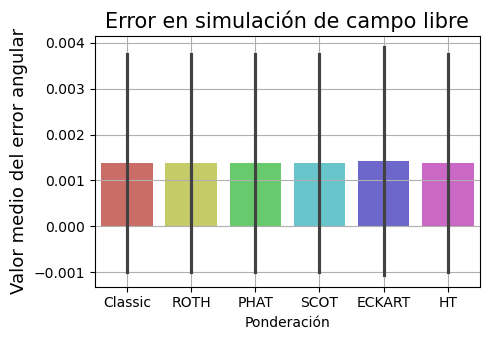

In [4]:
plot.plot_bars_error(df_campo_libre_filtrado, "method", "error", errorbar="sd", grid=True, y_label="Valor medio del error angular", x_label="Ponderación", figsize=(5, 3.5), title="Error en simulación de campo libre")

## Campo difuso

### T60

Para este análisis se repitió la variación de variables, 10 posiciones de fuente y 9 posiciones de array generados aleatoriamente, pero variando entre 10 valores de RT60 que van desde 0.2 hasta 1.1. Total de 900 simulaciones.

PD: sabemos que los valores ingresados del RT60 deseados no son los que van a haber en la simulación, pero obtener el valor real implicaba muchos cambios en el procesamiento (y más tiempo de simulación).

In [5]:
df_t60 = pd.read_csv("simulación_rt60 - correjido.csv")
df_t60 = df_t60.drop("Unnamed: 0", axis=1)
df_t60['room.t60'] = df_t60['room.t60'].round(2)
df_t60

,sim_name,method,expected_theta,theta_prom,error,est_theta_list,room.t60,mic_array.d,mic_array.position,source.position
0,"sim_T0.20s_d0.1_s[7.0,9.0,1.0]_m[4.0,0.0,1.0]",Classic,72.719,74.800,0.00013,[[ 0. 77.62 73.39 73.39]\r\n [ nan 0. 77...,0.2,0.1,"[4, 0, 1]","[7, 9, 1]"
1,"sim_T0.20s_d0.1_s[7.0,9.0,1.0]_m[4.0,0.0,1.0]",ROTH,72.719,74.562,0.00010,[[ 0. 77.62 73.39 71.96]\r\n [ nan 0. 77...,0.2,0.1,"[4, 0, 1]","[7, 9, 1]"
2,"sim_T0.20s_d0.1_s[7.0,9.0,1.0]_m[4.0,0.0,1.0]",PHAT,72.719,74.562,0.00010,[[ 0. 77.62 73.39 71.96]\r\n [ nan 0. 77...,0.2,0.1,"[4, 0, 1]","[7, 9, 1]"
3,"sim_T0.20s_d0.1_s[7.0,9.0,1.0]_m[4.0,0.0,1.0]",SCOT,72.719,74.562,0.00010,[[ 0. 77.62 73.39 71.96]\r\n [ nan 0. 77...,0.2,0.1,"[4, 0, 1]","[7, 9, 1]"
4,"sim_T0.20s_d0.1_s[7.0,9.0,1.0]_m[4.0,0.0,1.0]",ECKART,72.719,78.188,0.00092,[[ 0. 81.78 77.62 74.81]\r\n [ nan 0. 81...,0.2,0.1,"[4, 0, 1]","[7, 9, 1]"
...,...,...,...,...,...,...,...,...,...,...
5995,"sim_T1.10s_d0.1_s[2.0,4.0,1.0]_m[9.0,1.0,1.0]",ROTH,157.380,90.472,0.13817,[[ 0. 106.61 94.1 91.36]\r\n [ nan 0...,1.1,0.1,"[9, 1, 1]","[2, 4, 1]"
5996,"sim_T1.10s_d0.1_s[2.0,4.0,1.0]_m[9.0,1.0,1.0]",PHAT,157.380,84.863,0.16230,[[ 0. 106.61 94.1 91.36]\r\n [ nan 0...,1.1,0.1,"[9, 1, 1]","[2, 4, 1]"
5997,"sim_T1.10s_d0.1_s[2.0,4.0,1.0]_m[9.0,1.0,1.0]",SCOT,157.380,84.863,0.16230,[[ 0. 106.61 94.1 91.36]\r\n [ nan 0...,1.1,0.1,"[9, 1, 1]","[2, 4, 1]"
5998,"sim_T1.10s_d0.1_s[2.0,4.0,1.0]_m[9.0,1.0,1.0]",ECKART,157.380,98.105,0.10844,[[ 0. 98.22 96.15 99.6 ]\r\n [ nan 0. 98...,1.1,0.1,"[9, 1, 1]","[2, 4, 1]"


c:\Users\carme\Documentos\Untref\2025\Primer Cuatrimestre\Procesamiento Digital de Señales\DSP-TP\plot.py:439: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x=x, y=y, hue=hue, errorbar=errorbar, palette="hls")


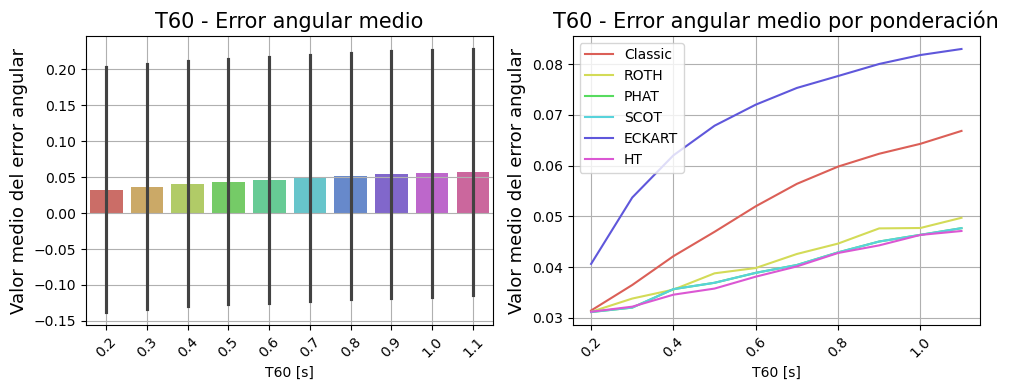

In [6]:
t60_bars = lambda: plot.plot_bars_error(df_t60, "room.t60", "error", errorbar="sd", grid=True, rotation=45, y_label="Valor medio del error angular", x_label="T60 [s]", title="T60 - Error angular medio", show=False)
t60_w_lines = lambda: plot.plot_lines_error(df_t60, "room.t60", "error", hue="method", grid=True, rotation=45, y_label="Valor medio del error angular", x_label="T60 [s]", title="T60 - Error angular medio por ponderación", legend=True, show=False)

plot.multiplot(t60_bars, t60_w_lines, figsize=(10, 4), ncols=2)

En el gráfico derecho llama la atención la presencia de solo 5 curvas en lugar de 6. Al analizar los valores de theta estimado para SCOT y PHAT se encuentra que con ambos filtrados se estima un theta exactamente igual. Al estar trabajando con señales reales, la multiplicación por el conjugado el SCOT hace que dichas ecuación sea igual a PHAT, por lo que es posible que la diferencia entre ellos haya sido muy pequeña y que luego de redondear decimales esta haya sido despreciada. Esto se repite de acá en adelante, no interpretamos que estuviera intrínsecamente mal.

In [7]:
df_t60_sp = df_t60[df_t60["method"] != "Classic"]
df_t60_sp = df_t60_sp[df_t60_sp["method"] != "HT"]
df_t60_sp = df_t60_sp[df_t60_sp["method"] != "ECKART"]
df_t60_sp = df_t60_sp[df_t60_sp["method"] != "ROTH"]
df_t60_sp[["sim_name", "method", "expected_theta", "theta_prom"]]

,sim_name,method,expected_theta,theta_prom
2,"sim_T0.20s_d0.1_s[7.0,9.0,1.0]_m[4.0,0.0,1.0]",PHAT,72.719,74.562
3,"sim_T0.20s_d0.1_s[7.0,9.0,1.0]_m[4.0,0.0,1.0]",SCOT,72.719,74.562
8,"sim_T0.20s_d0.1_s[7.0,9.0,1.0]_m[4.0,3.0,1.0]",PHAT,64.983,66.097
9,"sim_T0.20s_d0.1_s[7.0,9.0,1.0]_m[4.0,3.0,1.0]",SCOT,64.983,66.097
14,"sim_T0.20s_d0.1_s[7.0,9.0,1.0]_m[10.0,8.0,1.0]",PHAT,162.646,171.963
...,...,...,...,...
5985,"sim_T1.10s_d0.1_s[2.0,4.0,1.0]_m[6.0,7.0,1.0]",SCOT,144.462,103.042
5990,"sim_T1.10s_d0.1_s[2.0,4.0,1.0]_m[4.0,7.0,1.0]",PHAT,126.254,99.918
5991,"sim_T1.10s_d0.1_s[2.0,4.0,1.0]_m[4.0,7.0,1.0]",SCOT,126.254,99.918
5996,"sim_T1.10s_d0.1_s[2.0,4.0,1.0]_m[9.0,1.0,1.0]",PHAT,157.380,84.863


### Distancia entre arreglo y fuente

En este caso se varió la posición de la fuente, dejando fijo el array, y se varió el RT60 pero solo entre 5 valores. Total de 500 simulaciones.

In [8]:
df_ms_dist = pd.read_csv("simulación_d_s_m.csv")
df_ms_dist = df_ms_dist.drop("Unnamed: 0", axis=1)    
df_ms_dist

,sim_name,method,expected_theta,theta_prom,error,est_theta_list,room.t60,mic_array.d,mic_array.position,source.position,mic-source distance
0,"sim_T0.20s_d0.1_mic[5.0,2.0,1.0]_src[1.0,1.0,1.0]",Classic,166.608,172.840,0.00120,[[ 0. 180. 164.73 167.58]\r\n [ nan 0...,0.2,0.1,"[5, 2, 1]","[1.0, 1.0, 1.0]",4.317407
1,"sim_T0.20s_d0.1_mic[5.0,2.0,1.0]_src[1.0,1.0,1.0]",ROTH,166.608,180.000,0.00554,[[ 0. 180. 180. 180.]\r\n [ nan 0. 180. 180...,0.2,0.1,"[5, 2, 1]","[1.0, 1.0, 1.0]",4.317407
2,"sim_T0.20s_d0.1_mic[5.0,2.0,1.0]_src[1.0,1.0,1.0]",PHAT,166.608,180.000,0.00554,[[ 0. 180. 180. 180.]\r\n [ nan 0. 180. 180...,0.2,0.1,"[5, 2, 1]","[1.0, 1.0, 1.0]",4.317407
3,"sim_T0.20s_d0.1_mic[5.0,2.0,1.0]_src[1.0,1.0,1.0]",SCOT,166.608,180.000,0.00554,[[ 0. 180. 180. 180.]\r\n [ nan 0. 180. 180...,0.2,0.1,"[5, 2, 1]","[1.0, 1.0, 1.0]",4.317407
4,"sim_T0.20s_d0.1_mic[5.0,2.0,1.0]_src[1.0,1.0,1.0]",ECKART,166.608,149.500,0.00903,[[ 0. 149.04 149.04 151.8 ]\r\n [ nan 0...,0.2,0.1,"[5, 2, 1]","[1.0, 1.0, 1.0]",4.317407
...,...,...,...,...,...,...,...,...,...,...,...
2995,"sim_T0.80s_d0.1_mic[5.0,2.0,1.0]_src[9.0,9.0,1.0]",ROTH,61.504,78.975,0.00942,[[ 0. 85.9 69.07 92.73]\r\n [ nan 0. 85...,0.8,0.1,"[5, 2, 1]","[9.0, 9.0, 1.0]",7.964923
2996,"sim_T0.80s_d0.1_mic[5.0,2.0,1.0]_src[9.0,9.0,1.0]",PHAT,61.504,78.975,0.00942,[[ 0. 85.9 69.07 92.73]\r\n [ nan 0. 85...,0.8,0.1,"[5, 2, 1]","[9.0, 9.0, 1.0]",7.964923
2997,"sim_T0.80s_d0.1_mic[5.0,2.0,1.0]_src[9.0,9.0,1.0]",SCOT,61.504,78.975,0.00942,[[ 0. 85.9 69.07 92.73]\r\n [ nan 0. 85...,0.8,0.1,"[5, 2, 1]","[9.0, 9.0, 1.0]",7.964923
2998,"sim_T0.80s_d0.1_mic[5.0,2.0,1.0]_src[9.0,9.0,1.0]",ECKART,61.504,83.955,0.01556,[[ 0. 85.9 83.85 80.4 ]\r\n [ nan 0. 85...,0.8,0.1,"[5, 2, 1]","[9.0, 9.0, 1.0]",7.964923


c:\Users\carme\Documentos\Untref\2025\Primer Cuatrimestre\Procesamiento Digital de Señales\DSP-TP\plot.py:506: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=data, x=x, y=y, hue=hue, marker=marker, errorbar=errorbar, palette="hls")


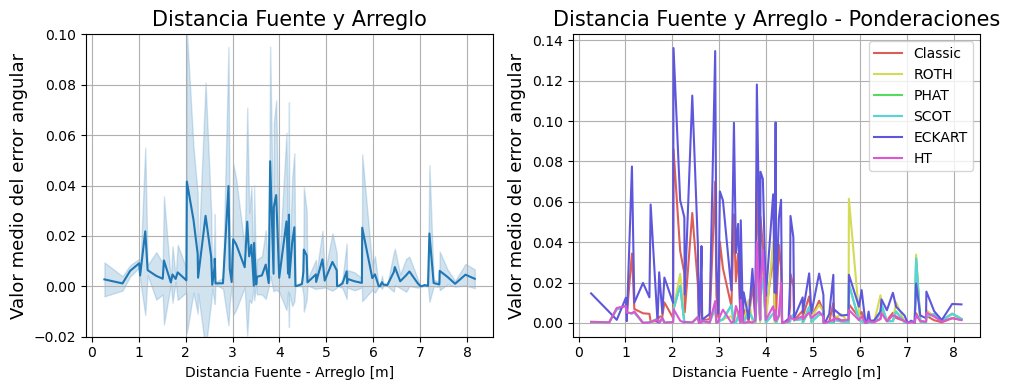

In [9]:
dsm_lines = lambda: plot.plot_lines_error(df_ms_dist, "mic-source distance", "error", errorbar="sd", grid=True, y_label="Valor medio del error angular", x_label="Distancia Fuente - Arreglo [m]", title="Distancia Fuente y Arreglo", ylimits=(-0.02, 0.1), show=False)
dsm_w_lines = lambda: plot.plot_lines_error(df_ms_dist, "mic-source distance", "error", hue="method", grid=True, y_label="Valor medio del error angular", x_label="Distancia Fuente - Arreglo [m]", title="Distancia Fuente y Arreglo - Ponderaciones", legend=True, show=False)

plot.multiplot(dsm_lines, dsm_w_lines, figsize=(10, 4), ncols=2)

c:\Users\carme\Documentos\Untref\2025\Primer Cuatrimestre\Procesamiento Digital de Señales\DSP-TP\plot.py:506: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=data, x=x, y=y, hue=hue, marker=marker, errorbar=errorbar, palette="hls")
c:\Users\carme\Documentos\Untref\2025\Primer Cuatrimestre\Procesamiento Digital de Señales\DSP-TP\plot.py:506: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=data, x=x, y=y, hue=hue, marker=marker, errorbar=errorbar, palette="hls")


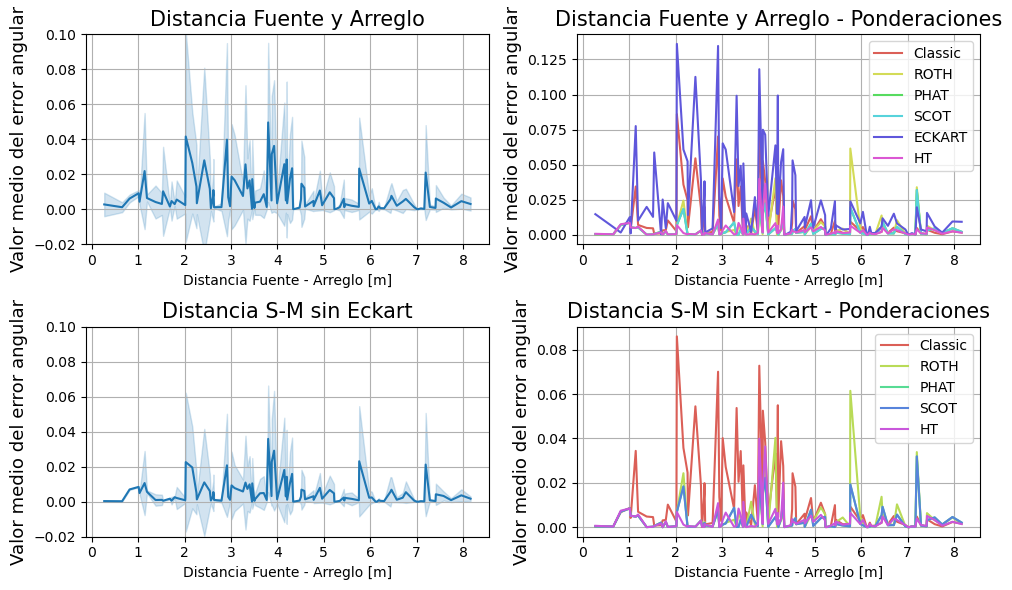

In [10]:
df_ms_dist_sin_eckart = df_ms_dist[df_ms_dist["method"] != "ECKART"]

dsm_lines_noeckart = lambda: plot.plot_lines_error(df_ms_dist_sin_eckart, "mic-source distance", "error", errorbar="sd", grid=True,  y_label="Valor medio del error angular", x_label="Distancia Fuente - Arreglo [m]", title="Distancia S-M sin Eckart", ylimits=(-0.02, 0.1),show=False)
dsm_w_lines_noeckart = lambda: plot.plot_lines_error(df_ms_dist_sin_eckart, "mic-source distance", "error", hue="method", grid=True, y_label="Valor medio del error angular", x_label="Distancia Fuente - Arreglo [m]", title="Distancia S-M sin Eckart - Ponderaciones", legend=True, show=False)

plot.multiplot(dsm_lines, dsm_w_lines,dsm_lines_noeckart, dsm_w_lines_noeckart, figsize=(10, 6), ncols=2)

### Frecuencia de sampleo

Para este caso se utilizó la misma generación que en el primer caso, 10 de fuente y 9 de micrófonos, pero solo tomando 5 valores de RT60 entre 0.2 s u 1.2 s, agregando la variación entre 5 frecuencias de muestreo. Total de 2250 simulaciones.

In [11]:
df_fs = pd.read_csv("simulación_fs.csv")
df_fs = df_fs.drop("Unnamed: 0", axis=1)
df_fs

,sim_name,method,expected_theta,theta_prom,error,est_theta_list,room.t60,mic_array.d,mic_array.n,mic_array.position,source.position,source.fs
0,"sim_T0.20s_d0.1_fs4000_s[7.0,6.0,1.0]_m[10.0,5...",Classic,162.646,150.172,0.00480,[[ 0. 149.04 149.04 124.87]\r\n [ nan 0...,0.2,0.1,4,"[10, 5, 1]","[7, 6, 1]",4000
1,"sim_T0.20s_d0.1_fs4000_s[7.0,6.0,1.0]_m[10.0,5...",ROTH,162.646,180.000,0.00930,[[ 0. 180. 180. 180.]\r\n [ nan 0. 180. 180...,0.2,0.1,4,"[10, 5, 1]","[7, 6, 1]",4000
2,"sim_T0.20s_d0.1_fs4000_s[7.0,6.0,1.0]_m[10.0,5...",PHAT,162.646,180.000,0.00930,[[ 0. 180. 180. 180.]\r\n [ nan 0. 180. 180...,0.2,0.1,4,"[10, 5, 1]","[7, 6, 1]",4000
3,"sim_T0.20s_d0.1_fs4000_s[7.0,6.0,1.0]_m[10.0,5...",SCOT,162.646,180.000,0.00930,[[ 0. 180. 180. 180.]\r\n [ nan 0. 180. 180...,0.2,0.1,4,"[10, 5, 1]","[7, 6, 1]",4000
4,"sim_T0.20s_d0.1_fs4000_s[7.0,6.0,1.0]_m[10.0,5...",ECKART,162.646,150.172,0.00480,[[ 0. 149.04 149.04 124.87]\r\n [ nan 0...,0.2,0.1,4,"[10, 5, 1]","[7, 6, 1]",4000
...,...,...,...,...,...,...,...,...,...,...,...,...
14995,"sim_T1.20s_d0.1_fs48000_s[4.0,0.0,1.0]_m[7.0,1...",ROTH,162.646,176.946,0.00631,[[ 0. 180. 180. 0. ]\r\n [ nan 0...,1.2,0.1,4,"[7, 1, 1]","[4, 0, 1]",48000
14996,"sim_T1.20s_d0.1_fs48000_s[4.0,0.0,1.0]_m[7.0,1...",PHAT,162.646,164.482,0.00010,[[ 0. 180. 117.68 0. ]\r\n [ nan 0...,1.2,0.1,4,"[7, 1, 1]","[4, 0, 1]",48000
14997,"sim_T1.20s_d0.1_fs48000_s[4.0,0.0,1.0]_m[7.0,1...",SCOT,162.646,164.482,0.00010,[[ 0. 180. 117.68 0. ]\r\n [ nan 0...,1.2,0.1,4,"[7, 1, 1]","[4, 0, 1]",48000
14998,"sim_T1.20s_d0.1_fs48000_s[4.0,0.0,1.0]_m[7.0,1...",ECKART,162.646,116.795,0.06489,[[ 0. 120.01 117.68 116.91]\r\n [ nan 0...,1.2,0.1,4,"[7, 1, 1]","[4, 0, 1]",48000


c:\Users\carme\Documentos\Untref\2025\Primer Cuatrimestre\Procesamiento Digital de Señales\DSP-TP\plot.py:439: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x=x, y=y, hue=hue, errorbar=errorbar, palette="hls")


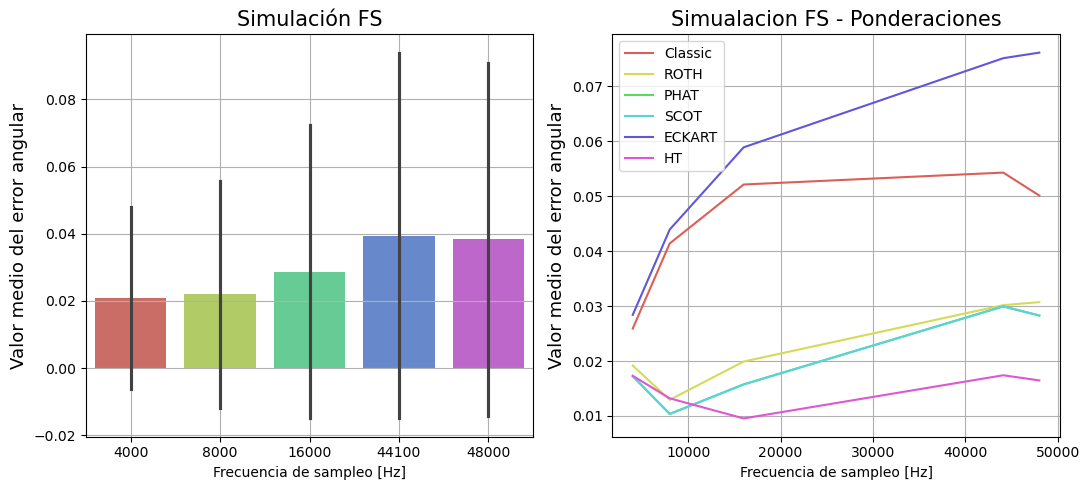

In [12]:
fs_lines = lambda: plot.plot_bars_error(df_fs, "source.fs", "error", errorbar="sd", grid=True, y_label="Valor medio del error angular", x_label="Frecuencia de sampleo [Hz]", title="Simulación FS", show=False)
fs_w_lines = lambda: plot.plot_lines_error(df_fs, "source.fs", "error", hue="method",  grid=True, y_label="Valor medio del error angular", x_label="Frecuencia de sampleo [Hz]", title="Simualacion FS - Ponderaciones", legend=True, show=False)

plot.multiplot(fs_lines, fs_w_lines, figsize=(11, 5), ncols=2)

### Ángulo de elevación

Como se mencionó al principio, este fue el único caso en que se modificó el valor en el eje z de la fuente, además no se generaron posiciones aleatorias sino que se fue variando entre valores de forma equiespaciada (linspace), más allá de eso se dejó fija la posición del micrófono inicial a partir del cuál se genera el array pero variando la distancia entre los micrófonos, por otro lado se varió el RT60 entre 5 valores. Total de 625 simulaciones.

In [13]:
def get_position(pos_list, axis=False):
    final_pos = []
    for pos in pos_list:
        new_pos = pos.strip()
        new_pos = new_pos.replace("[", "")
        new_pos = new_pos.replace("]", "")
        x, y, z = new_pos.split(",")
        x = np.round(float(x), 2)
        y = np.round(float(y), 2)
        z = np.round(float(z), 2)
        if not axis:
            final_pos.append([x, y, z])
        if axis == "x":
            final_pos.append(x)
        elif axis == "y":
            final_pos.append(y)
        elif axis == "z":
            final_pos.append(z)
        else:
            ValueError("Not possible axis")
    return final_pos


def angle_range(angles):
    ang_list = []
    for ang in angles:
        if ang >= 0 and ang <= 30:
            ang_list.append(1)
        elif ang > 30 and ang<= 60:
            ang_list.append(2)
        elif ang > 60 and ang <= 90:
            ang_list.append(3)
        elif ang >90 and ang <= 180:
            ang_list.append(4)
        else:
            ValueError(f'Todo esto está cursed')
    return ang_list

df_z = pd.read_csv("simulación_z.csv")
df_z = df_z.drop('Unnamed: 0', axis=1)

source_position = df_z["source.position"]
source_pos_list = list(source_position.values)
mic_array_position = df_z["mic_array.position"]
mic_array_position_list = list(mic_array_position.values)


x_source, y_source, z_source = get_position(source_pos_list, axis="x"), get_position(source_pos_list, axis="y"), get_position(source_pos_list, axis="z")
x_arr, y_arr, z_arr = get_position(mic_array_position, axis="x"), get_position(mic_array_position, axis="y"), get_position(mic_array_position, axis="z")

x_source, y_source, z_source = np.array(x_source), np.array(y_source), np.array(z_source)
x_arr, y_arr, z_arr = np.array(x_arr), np.array(y_arr), np.array(z_arr)

distance = np.sqrt((x_source-x_arr)**2 + (y_source-y_arr)**2 + (z_source-z_arr)**2)
distance = np.round(distance, 2)


z_ang = []
for i in range(len(z_source)):
    diff_z = np.absolute(z_source[i] - z_arr[i])
    phi = np.arccos(diff_z/distance[i])
    phi_ang = np.round(np.rad2deg(phi),0)
    z_ang.append(phi_ang)

angle_ranges = angle_range(z_ang)

df_z["mic-source distance"] = distance
df_z["source_z"] = z_source
df_z["z angle"] = z_ang
df_z["angle ranges"] = angle_ranges
df_z

,sim_name,method,expected_theta,theta_prom,error,est_theta_list,room.t60,mic_array.d,mic_array.position,source.position,mic-source distance,source_z,z angle,angle ranges
0,"sim_T0.20s_d0.1_s[3.0,8.0,0.5]_m[5.0,2.0,1.0]",Classic,110.072,108.647,0.00006,[[ 0. 110.93 108.76 108.04]\r\n [ nan 0...,0.2,0.1,"[5, 2, 1]","[3, 8, 0.5]",6.34,0.5,85.0,3
1,"sim_T0.20s_d0.1_s[3.0,8.0,0.5]_m[5.0,2.0,1.0]",ROTH,110.072,109.725,0.00000,[[ 0. 110.93 108.76 108.04]\r\n [ nan 0...,0.2,0.1,"[5, 2, 1]","[3, 8, 0.5]",6.34,0.5,85.0,3
2,"sim_T0.20s_d0.1_s[3.0,8.0,0.5]_m[5.0,2.0,1.0]",PHAT,110.072,109.725,0.00000,[[ 0. 110.93 108.76 108.04]\r\n [ nan 0...,0.2,0.1,"[5, 2, 1]","[3, 8, 0.5]",6.34,0.5,85.0,3
3,"sim_T0.20s_d0.1_s[3.0,8.0,0.5]_m[5.0,2.0,1.0]",SCOT,110.072,109.725,0.00000,[[ 0. 110.93 108.76 108.04]\r\n [ nan 0...,0.2,0.1,"[5, 2, 1]","[3, 8, 0.5]",6.34,0.5,85.0,3
4,"sim_T0.20s_d0.1_s[3.0,8.0,0.5]_m[5.0,2.0,1.0]",ECKART,110.072,108.647,0.00006,[[ 0. 110.93 108.76 108.04]\r\n [ nan 0...,0.2,0.1,"[5, 2, 1]","[3, 8, 0.5]",6.34,0.5,85.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3745,"sim_T0.80s_d1.0_s[7.0,7.0,2.5]_m[5.0,2.0,1.0]",ROTH,90.000,135.100,0.06278,[[ 0. 180. 90.2 0. ]\r\n [ nan 0. ...,0.8,1.0,"[5, 2, 1]","[7, 7, 2.5]",5.59,2.5,74.0,3
3746,"sim_T0.80s_d1.0_s[7.0,7.0,2.5]_m[5.0,2.0,1.0]",PHAT,90.000,120.133,0.02803,[[ 0. 180. 90.2 0. ]\r\n [ nan 0. ...,0.8,1.0,"[5, 2, 1]","[7, 7, 2.5]",5.59,2.5,74.0,3
3747,"sim_T0.80s_d1.0_s[7.0,7.0,2.5]_m[5.0,2.0,1.0]",SCOT,90.000,120.133,0.02803,[[ 0. 180. 90.2 0. ]\r\n [ nan 0. ...,0.8,1.0,"[5, 2, 1]","[7, 7, 2.5]",5.59,2.5,74.0,3
3748,"sim_T0.80s_d1.0_s[7.0,7.0,2.5]_m[5.0,2.0,1.0]",ECKART,90.000,72.297,0.00967,[[ 0. 63.24 28.05 75.38]\r\n [ nan 0...,0.8,1.0,"[5, 2, 1]","[7, 7, 2.5]",5.59,2.5,74.0,3


c:\Users\carme\Documentos\Untref\2025\Primer Cuatrimestre\Procesamiento Digital de Señales\DSP-TP\plot.py:506: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=data, x=x, y=y, hue=hue, marker=marker, errorbar=errorbar, palette="hls")


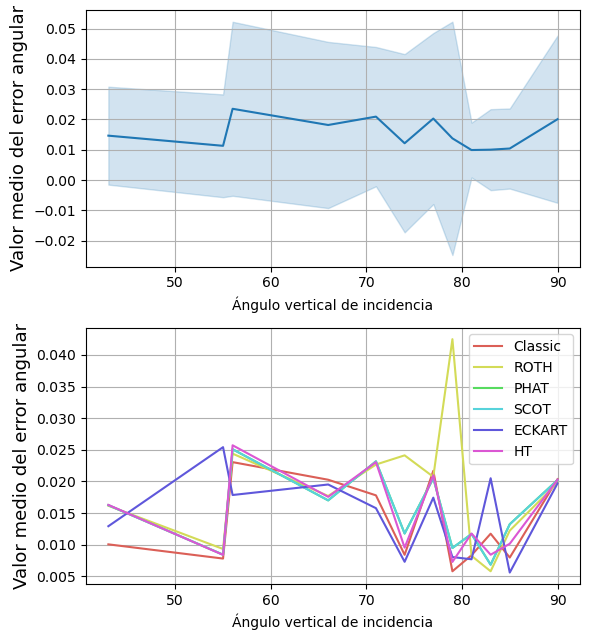

In [14]:
angles_bars_pd = lambda: plot.plot_lines_error(df_z, "z angle", "error", errorbar="sd", x_label="Ángulo vertical de incidencia", y_label="Valor medio del error angular", grid=True, show=False)
angles_pond_lines_pd = lambda: plot.plot_lines_error(df_z, "z angle", "error", hue="method", x_label="Ángulo vertical de incidencia", y_label="Valor medio del error angular", grid=True, legend=True, show=False)


plot.multiplot(angles_bars_pd, angles_pond_lines_pd, figsize=(6, 6.5), ncols=1)